In [ ]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,StackingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate, train_test_split
from sklearn.utils import check_random_state
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, \
                            accuracy_score, f1_score, roc_auc_score, plot_roc_curve, classification_report, \
                            precision_recall_curve, PrecisionRecallDisplay, confusion_matrix, ConfusionMatrixDisplay
from scikitplot.metrics import plot_lift_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Filter unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Set global variables
# pd.set_option('display.max_columns', None)
np.random.seed(142857)  # random seed

# from joblib import parallel_backend
# parallel_backend("loky", n_jobs=-2)
n_jobs = -1  # number of parallel processors to use
rs_iter = 500  # number of iterations for randomized search

Specifically, (i) 

***Task: The general task for this Project is to build two different models for detecting spam messages (based on  the  email  characteristics  that  are  given):*** 
* (i)  the  best  possible  model  that  you  can  build  in  terms  of  the overall predictive accuracy (i.e., not taking any cost information into account)
* (ii) the best cost-sensitive classification model that you can build in terms of the average misclassification cost.***

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 
    'capital_run_length_longest', 'capital_run_length_total', 'spam'
]

spambase = pd.read_csv(url, header=None, names=columns)
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
n_samples, n_features = spambase.shape
print ('The dimensions of the data set are', n_samples, 'by', n_features-1)
print('-'*40)
print('The number count correspond to different classes are: ', {spambase.spam.unique()[0]:spambase.spam.value_counts()[0],
                            spambase.spam.unique()[1]:spambase.spam.value_counts()[1]})
print('-'*40)
print('The features in the data set are:', list(spambase.columns[:-1]))

The dimensions of the data set are 4601 by 57
----------------------------------------
The number count correspond to different classes are:  {1: 2788, 0: 1813}
----------------------------------------
The features in the data set are: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', '

## Preprocessor

In [ ]:
X = spambase.iloc[:, :-1] 
y = spambase.iloc[:, -1]


preprocessor = ColumnTransformer(
                                transformers=[
                                    ("num", StandardScaler(), X.columns)
                                ],
                                remainder='passthrough'
                            )

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## General Model

### Model Comparison

In [ ]:
# Defince scoring metric
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'AUC': 'roc_auc'
}

# Initialize pipelines of different models
pipelines = {
    'Naive Bayers': Pipeline([('preprocessor', preprocessor), ('model', GaussianNB())]),
    'Logistic Regression': Pipeline([('preprocessor', preprocessor), ('model', LogisticRegression(n_jobs=n_jobs))]),
    'KNN': Pipeline([('preprocessor', preprocessor), ('model', KNeighborsClassifier(n_jobs=n_jobs))]),
    'Linear SVC': Pipeline([('preprocessor', preprocessor), ('model', LinearSVC())]),
    'SVC': Pipeline([('preprocessor', preprocessor), ('model', SVC())]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('model', RandomForestClassifier(n_jobs=n_jobs))]),
    'LightGBM': Pipeline([('preprocessor', preprocessor), ('model', LGBMClassifier(objective='binary',
                                                                                   n_jobs=n_jobs))]),
    'Xgboost': Pipeline([('preprocessor', preprocessor), ('model', XGBClassifier(objective='binary:logistic',
                                                                                 use_label_encoder=False,
                                                                                 verbosity=0,
                                                                                 early_stopping_rounds=30,
                                                                                 n_jobs=n_jobs))])
}

# Set up possible values of parameters grid to search over
parameter_grids = {
    'nb_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                'model__var_smoothing': sp.stats.loguniform(1e-15, 1e15)},

    'lr_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                'model__penalty': ['elasticnet'],
                'model__C': sp.stats.loguniform(1e-3, 1e3),
                'model__solver': ['saga'],
                'model__l1_ratio': sp.stats.uniform(0, 1)},  # 0 is equivalent to l2, 1 is equivalent to l1},

    'knn_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                 'model__n_neighbors': [*range(1, 100, 2)], # odd numbers only
                 'model__weights': ['uniform', 'distance'],
                 'model__leaf_size': sp.stats.randint(1, 30),
                 'model__p': [1, 2]},

    'lsvc_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__C': sp.stats.loguniform(1e-3, 1e3),
                  'model__penalty': ['l1', 'l2'],
                  'model__loss': ['hinge', 'squared_hinge']},

    'svc_grid': [{'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__C': sp.stats.loguniform(1e-3, 1e3),
                  'model__gamma': ['scale', 'auto'],
                  'model__kernel': ['rbf']},
        
                 {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__C': sp.stats.loguniform(1e-3, 1e3),
                  'model__gamma': ['scale', 'auto'],
                  'model__degree': [*range(2, 5)],
                  'model__kernel': ['poly']}],

    'rf_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                'model__n_estimators': sp.stats.randint(5, 501),
                'model__max_depth': sp.stats.randint(3, 15),
                'model__min_samples_split': sp.stats.randint(2, 30),
                'model__min_samples_leaf': sp.stats.randint(1, 50),
                'model__min_impurity_decrease': sp.stats.uniform(0, 0.5)},

    'lgbm_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__n_estimators': sp.stats.randint(5, 501),
                  'model__max_depth': sp.stats.randint(3, 15),
                  'model__learning_rate': sp.stats.loguniform(1e-3, 5e-1),
                  'model__colsample_bytree': sp.stats.uniform(0.5, 1),
                  'model__reg_alpha': sp.stats.uniform(0, 1),
                  'model__reg_lambda': sp.stats.uniform(0, 1)},

    'xgb_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                 'model__n_estimators': sp.stats.randint(5, 501),
                 'model__max_depth': sp.stats.randint(3, 15),
                 'model__learning_rate': sp.stats.loguniform(1e-3, 5e-1),
                 'model__colsample_bytree': sp.stats.uniform(0.5, 1),
                 'model__reg_alpha': sp.stats.uniform(0, 1),
                 'model__reg_lambda': sp.stats.uniform(0, 1)}
}


cv = StratifiedKFold(n_splits=5, shuffle=True)
models = {}  # dictionary to store the best model for each technique

for p, g in zip(pipelines, parameter_grids):
    # Configure the RandomizedSearchCV hyper-parameter tuning
    model = RandomizedSearchCV(estimator=pipelines[p], 
                                param_distributions=parameter_grids[g],
                                n_iter=rs_iter,
                                cv=cv, 
                                scoring=scoring,
                                refit='accuracy',
                                n_jobs=n_jobs)
    
    # Training and report the testing performance
    model.fit(X_train, y_train)
    results = model.cv_results_
    best_index = model.best_index_

    # Append the fine tune model to the dictionary
    models[p] = model

    # Report performance
    print(f'Model: {p}')
    print("best hyper-parameter: ", model.best_params_)
    # print(f"training time: {results['mean_fit_time'].sum() + results['mean_score_time'].sum():.2f} seconds")
    print(f"training AUC: {results['mean_test_AUC'][best_index]:.2%} (+/- {results['std_test_AUC'][best_index]:.2%})")
    print(f"training Accuracy: {results['mean_test_accuracy'][best_index]:.2%} (+/- {results['std_test_accuracy'][best_index]:.2%})")
    print(f"training F1: {results['mean_test_f1_macro'][best_index]:.2%} (+/- {results['std_test_f1_macro'][best_index]:.2%})")
    print('-'*30)

Model: Naive Bayers
best hyper-parameter:  {'model__var_smoothing': 7.737925502919828, 'preprocessor__num': StandardScaler()}
training AUC: 94.18% (+/- 0.39%)
training Accuracy: 88.26% (+/- 1.86%)
training F1: 87.87% (+/- 1.78%)
------------------------------
Model: Logistic Regression
best hyper-parameter:  {'model__C': 117.59429608970598, 'model__l1_ratio': 0.9871662395269019, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'preprocessor__num': MinMaxScaler()}
training AUC: 96.91% (+/- 0.51%)
training Accuracy: 91.88% (+/- 1.66%)
training F1: 91.42% (+/- 1.80%)
------------------------------
Model: KNN
best hyper-parameter:  {'model__leaf_size': 29, 'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance', 'preprocessor__num': StandardScaler()}
training AUC: 97.11% (+/- 0.49%)
training Accuracy: 92.34% (+/- 0.87%)
training F1: 91.82% (+/- 0.98%)
------------------------------
Model: Linear SVC
best hyper-parameter:  {'model__C': 3.795442448085165, 'model__loss': 

**Staking Classifier**

In [ ]:
# Define Stacking Classifier
staking_clf = StackingClassifier(
    estimators=[
        ('nb', models['Naive Bayers'].best_estimator_),
        ('knn', models['KNN'].best_estimator_),
        ('lsvc', models['Linear SVC'].best_estimator_),
        ('svc', models['SVC'].best_estimator_),
        ('rf', models['Random Forest'].best_estimator_),
        ('lgbm', models['LightGBM'].best_estimator_),
        ('xgb', models['Xgboost'].best_estimator_)                                                                  
    ],
    final_estimator=LogisticRegression(),
    cv=cv,
    n_jobs=n_jobs,  # n_jobs sometime will cause error (not sure why)
    # passthrough=True  # pass the original features to the final estimator
)

staking_clf.fit(X_train, y_train)
models['Stacking Classifier'] = staking_clf

y_pred = models['Stacking Classifier'].predict(X_train)
print(f"training AUC: {roc_auc_score(y_train, y_pred):.2%}")
print(f"training Accuracy: {accuracy_score(y_train, y_pred):.2%}")
print(f"training F1: {f1_score(y_train, y_pred, average='macro'):.2%}")

training AUC: 99.78%
training Accuracy: 99.81%
training F1: 99.80%


### Report best model on testing Set

In [ ]:
y_pred = models['Stacking Classifier'].predict(X_test)
y_prob = models['Stacking Classifier'].predict_proba(X_test)[:, 1]

# Report performance
print(classification_report(y_test, y_pred, target_names=['not spam', 'spam'], digits=4, output_dict=False))

              precision    recall  f1-score   support

    not spam     0.9782    0.9642    0.9711       558
        spam     0.9461    0.9669    0.9564       363

    accuracy                         0.9653       921
   macro avg     0.9621    0.9655    0.9638       921
weighted avg     0.9655    0.9653    0.9653       921



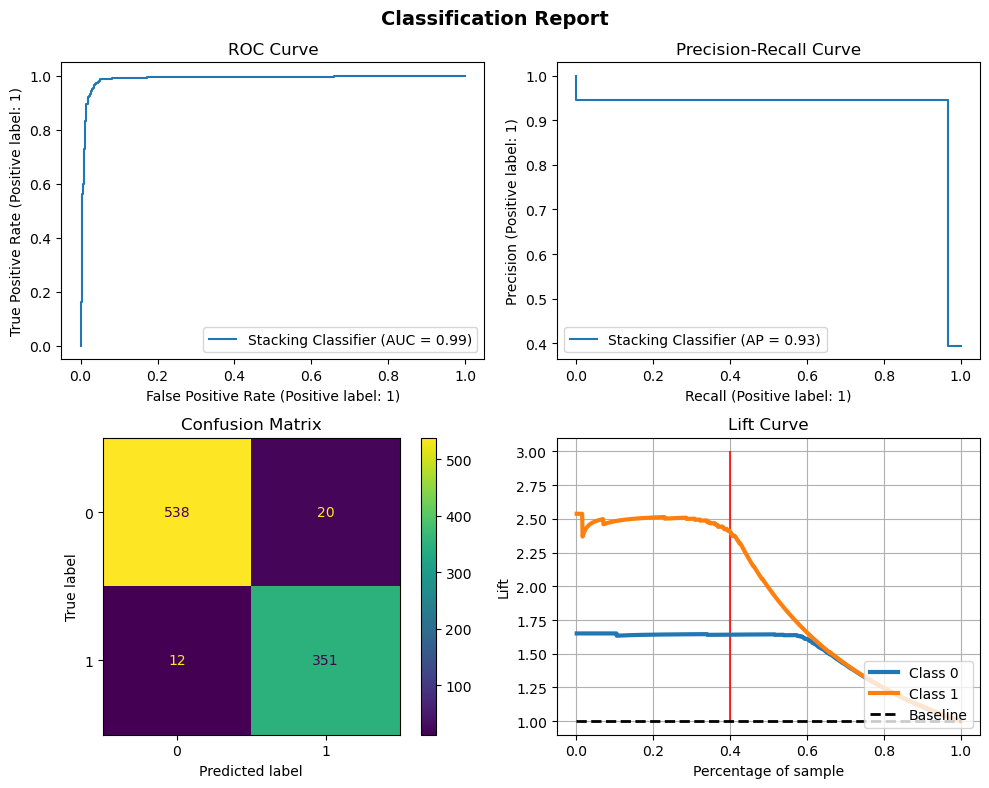

In [ ]:
# Plottings
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()  # flattening the array makes indexing easier

plt.suptitle('Classification Report', fontsize=14, fontweight='bold')

plot_roc_curve(models['Stacking Classifier'], X_test, y_test, name='Stacking Classifier', ax=axes[0])
axes[0].title.set_text('ROC Curve')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name='Stacking Classifier', ax=axes[1])
axes[1].title.set_text('Precision-Recall Curve')
cm = confusion_matrix(y_test, y_pred)
axes[2].title.set_text('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[2])

y_prob = model.predict_proba(X_test)
plot_lift_curve(y_test, y_prob, title='Lift Curve', ax=axes[3])
plt.vlines(x=0.4, ymin=1, ymax=3, colors='red', alpha=0.8, linestyles='-')

fig.tight_layout()

I chose the standard train-test split method for this dataset over the nested cross-validation structure because I want to utilize stacking techniques to stack all the fine-tuned base models. I tried out `Naive Bayes`, `Logistic Regression`, `KNN`, `SVM`, `Random Forest`, `LightGBM`, `Xgboost` along with the `RandomizedSearchCV` to explore the different hyperparameter combinations(including different preprocessing techniques) for all of the base models. `LightGBM` has the best predictive performance among these base models with an accuracy score and AUC over 95.5% and 98.5%, respectively. However, if we further stack these base models(exclude the fine-tuned `Logistic Regression`) with the regular `Logistic Regression` as the final meta-model, we can even improve the aforementioned metrics to over 99%. Therefore, I used this stacking classifier as the final model and applied it to the testing dataset. 

The final model demonstrates a good performance on the testing set with predictive accuracy, precision, recall, f-measure all above 95%. Moreover, the ROC (with AUC = 0.99) curve implies that the model has the ability to rank the positive class higher than the negative class consistently. The precision-recall curve is also included to show that the model can maintain approximately 95% precision until 80% recall (the decline, in the beginning, might indicate some hard predicting targets in the testing set). As for the Lift Curve, we can see that the model's top 40% prediction is almost 2.5x as good at predicting the outcome as a random guess.

## Cost-Sensitive Classification Model

### Define class weight & customized cost function

Categorizing not_spam (0) as spam (1) is more costly than categorizing spam (1) as not_spam (0) because users might suffer from missing important email. In other words, not_spam (0) is more important than spam (1). So we set the cost ratio to 10:1.

In [ ]:
# Define class weight
class_weight = {0:10.0, 1:1.0}

# Define Custom metric for Cost Sensitive Learning 
def cost_sensitive_loss_func(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 0*tn + 10*fp + 1*fn + 0*tp
    return cost

cost_scoring = make_scorer(cost_sensitive_loss_func, greater_is_better=False)

### Model Comparison

In [ ]:
# Defince scoring metric
scoring = {
    'neg_custom_cost': cost_scoring,
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'AUC': 'roc_auc'
}

# Initialize pipelines of different models
pipelines = {
    'Naive Bayers': Pipeline([('preprocessor', preprocessor), ('model', GaussianNB())]),
    'Logistic Regression': Pipeline([('preprocessor', preprocessor), ('model', LogisticRegression(class_weight=class_weight,
                                                                                                  n_jobs=n_jobs))]),
    'KNN': Pipeline([('preprocessor', preprocessor), ('model', KNeighborsClassifier(n_jobs=n_jobs))]),
    'Linear SVC': Pipeline([('preprocessor', preprocessor), ('model', LinearSVC(class_weight=class_weight, ))]),
    'SVC': Pipeline([('preprocessor', preprocessor), ('model', SVC(class_weight=class_weight))]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('model', RandomForestClassifier(class_weight=class_weight,
                                                                                                n_jobs=n_jobs))]),
    'LightGBM': Pipeline([('preprocessor', preprocessor), ('model', LGBMClassifier(objective='binary',
                                                                                   class_weight=class_weight,
                                                                                   n_jobs=n_jobs))]),
    'Xgboost': Pipeline([('preprocessor', preprocessor), ('model', XGBClassifier(objective='binary:logistic',
                                                                                 use_label_encoder=False,
                                                                                 scale_pos_weight=0.1,  # 1/10
                                                                                 early_stopping_rounds=30,
                                                                                 verbosity=0,
                                                                                 n_jobs=n_jobs))])
}

# Set up possible parameters grid to search over
parameter_grids = {
    'nb_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                'model__var_smoothing': sp.stats.loguniform(1e-15, 1e15)},

    'lr_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                'model__penalty': ['elasticnet'],
                'model__C': sp.stats.loguniform(1e-3, 1e3),
                'model__solver': ['saga'],
                'model__l1_ratio': sp.stats.uniform(0, 1)},  # 0 is equivalent to l2, 1 is equivalent to l1},

    'knn_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                 'model__n_neighbors': [*range(1, 100, 2)], # odd numbers only
                 'model__weights': ['uniform', 'distance'],
                 'model__leaf_size': sp.stats.randint(1, 30),
                 'model__p': [1, 2]},

    'lsvc_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__C': sp.stats.loguniform(1e-3, 1e3),
                  'model__penalty': ['l1', 'l2'],
                  'model__loss': ['hinge', 'squared_hinge']},

    'svc_grid': [{'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__C': sp.stats.loguniform(1e-3, 1e3),
                  'model__gamma': ['scale', 'auto'],
                  'model__kernel': ['rbf']},
        
                 {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__C': sp.stats.loguniform(1e-3, 1e3),
                  'model__gamma': ['scale', 'auto'],
                  'model__degree': [*range(2, 5)],
                  'model__kernel': ['poly']}],

    'rf_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                'model__n_estimators': sp.stats.randint(5, 501),
                'model__max_depth': sp.stats.randint(3, 15),
                'model__min_samples_split': sp.stats.randint(2, 30),
                'model__min_samples_leaf': sp.stats.randint(1, 50),
                'model__min_impurity_decrease': sp.stats.uniform(0, 0.5)},

    'lgbm_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  'model__n_estimators': sp.stats.randint(5, 501),
                  'model__max_depth': sp.stats.randint(3, 15),
                  'model__learning_rate': sp.stats.loguniform(1e-3, 5e-1),
                  'model__colsample_bytree': sp.stats.uniform(0.5, 1),
                  'model__reg_alpha': sp.stats.uniform(0, 1),
                  'model__reg_lambda': sp.stats.uniform(0, 1)},

    'xgb_grid': {'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
                 'model__n_estimators': sp.stats.randint(5, 501),
                 'model__max_depth': sp.stats.randint(3, 15),
                 'model__learning_rate': sp.stats.loguniform(1e-3, 5e-1),
                 'model__colsample_bytree': sp.stats.uniform(0.5, 1),
                 'model__reg_alpha': sp.stats.uniform(0, 1),
                 'model__reg_lambda': sp.stats.uniform(0, 1)}
}


cv = StratifiedKFold(n_splits=5, shuffle=True)
models = {}  # dictionary to store the best model for each technique

for p, g in zip(pipelines, parameter_grids):
    # Configure the RandomizedSearchCV hyper-parameter tuning
    model = RandomizedSearchCV(estimator=pipelines[p], 
                                param_distributions=parameter_grids[g],
                                n_iter=rs_iter,
                                cv=cv, 
                                scoring=scoring,
                                refit='neg_custom_cost',
                                n_jobs=n_jobs)
    
    # Training and report the testing performance
    model.fit(X_train, y_train)
    results = model.cv_results_
    best_index = model.best_index_

    # Append the fine tune model to the dictionary
    models[p] = model

    # Report performance
    print(f'Model: {p}')
    print("best hyper-parameter: ", model.best_params_)
    print(f"training time: {results['mean_fit_time'].sum() + results['mean_score_time'].sum():.2f} seconds")
    print(f"training Cost Sensitive Loss: {abs(results['mean_test_neg_custom_cost'][best_index]):.2f} (+/- {results['std_test_neg_custom_cost'][best_index]:.2f})")
    print(f"training AUC: {results['mean_test_AUC'][best_index]:.2%} (+/- {results['std_test_AUC'][best_index]:.2%})")
    print(f"training Accuracy: {results['mean_test_accuracy'][best_index]:.2%} (+/- {results['std_test_accuracy'][best_index]:.2%})")
    print(f"training F1: {results['mean_test_f1_macro'][best_index]:.2%} (+/- {results['std_test_f1_macro'][best_index]:.2%})")
    print('-'*30)

Model: Naive Bayers
best hyper-parameter:  {'model__var_smoothing': 21.086046696060883, 'preprocessor__num': StandardScaler()}
training time: 33.98 seconds
training Cost Sensitive Loss: 236.00 (+/- 24.78)
training AUC: 94.33% (+/- 0.44%)
training Accuracy: 75.03% (+/- 2.45%)
training F1: 68.71% (+/- 3.83%)
------------------------------
Model: Logistic Regression
best hyper-parameter:  {'model__C': 117.59429608970598, 'model__l1_ratio': 0.9871662395269019, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'preprocessor__num': MinMaxScaler()}
training time: 237.86 seconds
training Cost Sensitive Loss: 179.60 (+/- 10.67)
training AUC: 96.60% (+/- 0.55%)
training Accuracy: 81.71% (+/- 1.45%)
training F1: 78.57% (+/- 2.00%)
------------------------------
Model: KNN
best hyper-parameter:  {'model__leaf_size': 1, 'model__n_neighbors': 59, 'model__p': 1, 'model__weights': 'distance', 'preprocessor__num': StandardScaler()}
training time: 335.51 seconds
training Cost Sensitive Loss: 121.

**Staking Classifier**

In [ ]:
# Define Stacking Classifier
staking_clf = StackingClassifier(
    estimators=[
        ('nb', models['Naive Bayers'].best_estimator_),
        ('knn', models['KNN'].best_estimator_),
        ('lsvc', models['Linear SVC'].best_estimator_),
        ('svc', models['SVC'].best_estimator_),
        ('rf', models['Random Forest'].best_estimator_),
        ('lgbm', models['LightGBM'].best_estimator_),
        ('xgb', models['Xgboost'].best_estimator_)                                                                  
    ],
    final_estimator=LogisticRegression(class_weight=class_weight),  # n_jobs will cause error (not sure why)
    cv=cv,
    n_jobs=n_jobs,
    # passthrough=True
)

staking_clf.fit(X_train, y_train)
models['Stacking Classifier'] = staking_clf

y_pred = models['Stacking Classifier'].predict(X_train)
print(f"training Cost Sensitive Loss: {cost_sensitive_loss_func(y_train, y_pred):.4f}")
print(f"training AUC: {roc_auc_score(y_train, y_pred):.2%}")
print(f"training Accuracy: {accuracy_score(y_train, y_pred):.2%}")
print(f"training F1: {f1_score(y_train, y_pred, average='macro'):.2%}")

training Cost Sensitive Loss: 116.0000
training AUC: 96.00%
training Accuracy: 96.85%
training F1: 96.65%


In [ ]:
y_pred = models['Stacking Classifier'].predict(X_test)
print(f"testing Cost Sensitive Loss: {cost_sensitive_loss_func(y_test, y_pred):.4f}")
print('-'*30)
print(classification_report(y_test, y_pred, target_names=['not spam', 'spam'], digits=4, output_dict=False))

testing Cost Sensitive Loss: 114.0000
------------------------------
              precision    recall  f1-score   support

    not spam     0.8963    0.9910    0.9413       558
        spam     0.9836    0.8237    0.8966       363

    accuracy                         0.9251       921
   macro avg     0.9399    0.9074    0.9189       921
weighted avg     0.9307    0.9251    0.9236       921



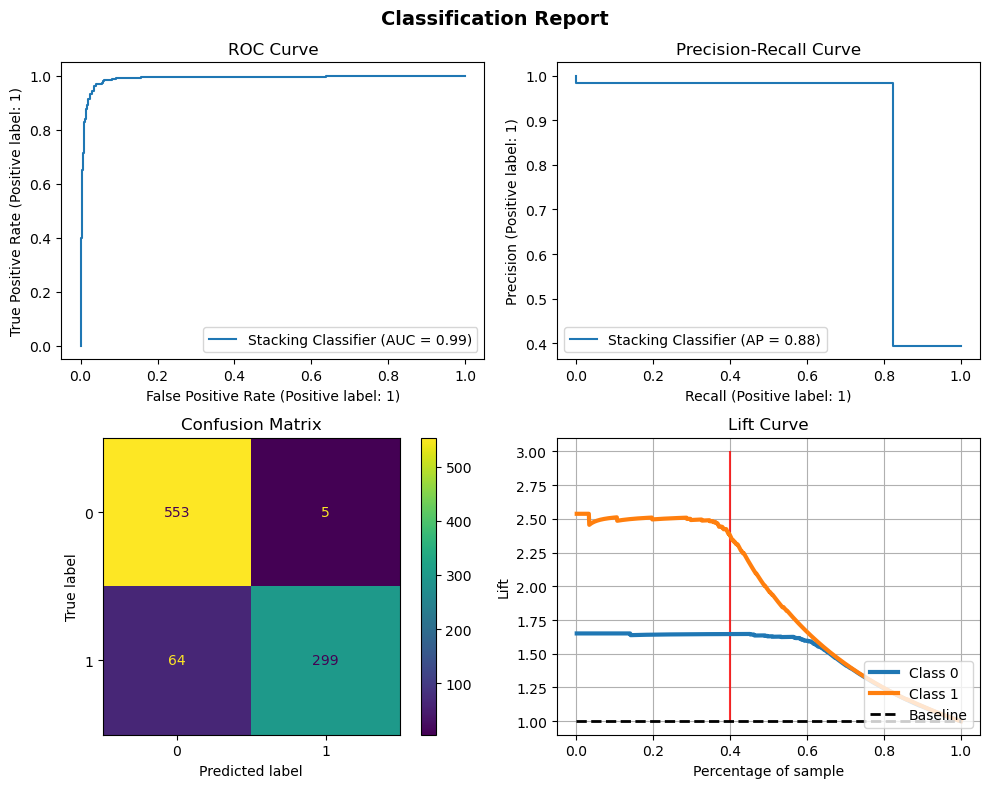

In [ ]:
# Plottings
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()  # flattening the array makes indexing easier

plt.suptitle('Classification Report', fontsize=14, fontweight='bold')

plot_roc_curve(models['Stacking Classifier'], X_test, y_test, name='Stacking Classifier', ax=axes[0])
axes[0].title.set_text('ROC Curve')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name='Stacking Classifier', ax=axes[1])
axes[1].title.set_text('Precision-Recall Curve')
cm = confusion_matrix(y_test, y_pred)
axes[2].title.set_text('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[2])

y_prob = model.predict_proba(X_test)
plot_lift_curve(y_test, y_prob, title='Lift Curve', ax=axes[3])
plt.vlines(x=0.4, ymin=1, ymax=3, colors='red', alpha=0.8, linestyles='-')

fig.tight_layout()

For the cost-sensitive model, I follow a similar procedure and structure in the regular model but with two main differences. First, I set the `class_weight` parameter to adjust the weight of the two classes. With the {0:10, 1:1} setting, this can tell the classifier that not spam(0) class is 10x as crucial as the spam (1) class, and they should incorporate this during the training process. Second, I built a `customized cost function` to calculate the average misclassification cost and leveraged this function for searching the best hyperparameter combinations.

Overall, this final cost-sensitive model is not comparable with the general model we build earlier in terms of predictive power. Still, it demonstrates a good general performance with accuracy, precision, recall, f-measure all above 90%. More importantly, it can make a classification that generates a much lower total cost than the general model with only minor sacrifices on the common classification performance metrics. (*cost-sensitive cost: 114* vs *general model cost: 212*, base on the confusion matrix in the plots) 